# The Math of Intelligence (Week 1) - Support Vector Machine Classification


## What will we do?

We will build a Support Vector Machine that will find the optimal hyperplane that maximizes the margin between two toy data classes using gradient descent.  

![alt text](http://opticalengineering.spiedigitallibrary.org/data/journals/optice/24850/oe_52_2_027003_f005.png "Logo Title Text 1")


## What are some use cases for SVMs?

-Classification, regression (time series prediction, etc) , outlier detection, clustering

## Other Examples

- Learning to use Scikit-learn's SVM function to classify images https://github.com/ksopyla/svm_mnist_digit_classification
- Pulse classification, more useful dataset 
https://github.com/akasantony/pulse-classification-svm

## How does an SVM compare to other ML algorithms?

![alt text](https://image.slidesharecdn.com/mscpresentation-140722065852-phpapp01/95/msc-presentation-bioinformatics-7-638.jpg?cb=1406012610 "Logo Title Text 1")

- As a rule of thumb, SVMs are great for relatively small data sets with fewer outliers. 
- Other algorithms (Random forests, deep neural networks, etc.) require more data but almost always come up with very robust models.
- The decision of which classifier to use depends on your dataset and the general complexity of the problem.
- "Premature optimization is the root of all evil (or at least most of it) in programming." - Donald Knuth, CS Professor (Turing award speech 1974)  


## What is a Support Vector Machine?

It's a supervised machine learning algorithm which can be used for both classification or regression problems. But it's usually used for classification. Given 2 or more labeled classes of data, it acts as a discriminative classifier, formally defined by an optimal hyperplane that seperates all the classes. New examples that are then mapped into that same space can then be categorized based on on which side of the gap they fall.

## What are Support Vectors?

![alt text](https://www.dtreg.com/uploaded/pageimg/SvmMargin2.jpg "Logo Title Text 1")
 
Support vectors are the data points nearest to the hyperplane, the points of a data set that, if removed, would alter the position of the dividing hyperplane. Because of this, they can be considered the critical elements of a data set, they are what help us build our SVM. 

## Whats a hyperplane?

![alt text](http://slideplayer.com/slide/1579281/5/images/32/Hyperplanes+as+decision+surfaces.jpg "Logo Title Text 1")

Geometry tells us that a hyperplane is a subspace of one dimension less than its ambient space. For instance, a hyperplane of an n-dimensional space is a flat subset with dimension n − 1. By its nature, it separates the space into two half spaces.

## Linear vs nonlinear classification?

Sometimes our data is linearly seperable. That means for N classes with M features, we can learn a mapping that is a linear combination. (like y = mx + b). Or even a multidimensional hyperplane (y = x + z + b + q). No matter how many dimensions/features a set of classes have, we can represent the mapping using a linear function.

But sometimes its not. Like if there was a quadratic mapping. Luckily for us SVMs can can efficiently perform a non-linear classification using what is called the kernel trick. I'll talk about that lter on in the course. 

![alt text](https://media.licdn.com/mpr/mpr/AAEAAQAAAAAAAAuSAAAAJDlhYzcwMzhlLTA0MjYtNDEyYS1hMWM4LTE3Zjk5NDlhNzVkMQ.png "Logo Title Text 1")

Alright let's get to building!

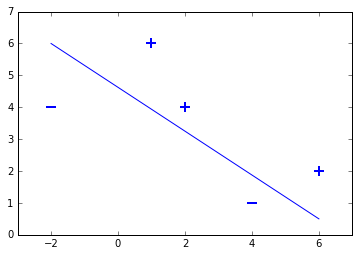

In [8]:
#To help us perform math operations
import numpy as np
#to plot our data and model visually
from matplotlib import pyplot as plt
%matplotlib inline

#Step 1 - Define our data

#Input data - Of the form [X value, Y value, Bias term]
X = np.array([
    [-2,4,-1],
    [4,1,-1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

#Associated output labels - First 2 examples are labeled '-1' and last 3 are labeled '+1'
y = np.array([-1,-1,1,1,1])

#lets plot these examples on a 2D graph!
#for each example
for d, sample in enumerate(X):
    # Plot the negative samples (the first 2)
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples (the last 3)
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Print a possible hyperplane, that is seperating the two classes.
#we'll two points and draw the line between them (naive guess)
plt.plot([-2,6],[6,0.5])

## Let's define our loss function (what to minimize) and our objective function (what to optimize)

#### Loss function

We'll use the Hinge loss. This is a loss function used for training classifiers. The hinge loss is used for "maximum-margin" classification, most notably for support vector machines (SVMs).

![alt text](http://i.imgur.com/OzCwzyN.png "Logo Title Text 1")


c is the loss function, x the sample, y is the true label, f(x) the predicted label.

![alt text](http://i.imgur.com/FZ7JcG3.png "Logo Title Text 1")

 
#### Objective Function

![alt text](http://i.imgur.com/I5NNu44.png "Logo Title Text 1")

As you can see, our objective of a SVM consists of two terms. The first term is a regularizer, the heart of the SVM, the second term the loss. The regularizer balances between margin maximization and loss. We want to find the decision surface that is maximally far away from any data points.

How do we minimize our loss/optimize for our objective (i.e learn)?

We have to derive our objective function to get the gradients! Gradient descent ftw.  As we have two terms, we will derive them seperately using the sum rule in differentiation.


![alt text](http://i.imgur.com/6uK3BnH.png "Logo Title Text 1")

This means, if we have a misclassified sample, we update the weight vector w using the gradients of both terms, else if classified correctly,we just update w by the gradient of the regularizer.



Misclassification condition 

![alt text](http://i.imgur.com/g9QLAyn.png "Logo Title Text 1")

Update rule for our weights (misclassified)

![alt text](http://i.imgur.com/rkdPpTZ.png "Logo Title Text 1")

including the learning rate η and the regularizer λ
The learning rate is the length of the steps the algorithm makes down the gradient on the error curve.
- Learning rate too high? The algorithm might overshoot the optimal point.
- Learning rate too low? Could take too long to converge. Or never converge.

The regularizer controls the trade off between the achieving a low training error and a low testing error that is the ability to generalize your classifier to unseen data. As a regulizing parameter we choose 1/epochs, so this parameter will decrease, as the number of epochs increases.
- Regularizer too high? overfit (large testing error) 
- Regularizer too low? underfit (large training error) 

Update rule for our weights (correctly classified)

![alt text](http://i.imgur.com/xTKbvZ6.png "Logo Title Text 1")


In [9]:
#lets perform stochastic gradient descent to learn the seperating hyperplane between both classes

def svm_sgd_plot(X, Y):
    #Initialize our SVMs weight vector with zeros (3 values)
    w = np.zeros(len(X[0]))
    #The learning rate
    eta = 1
    #how many iterations to train for
    epochs = 100000
    #store misclassifications so we can plot how they change over time
    errors = []

    #training part, gradient descent part
    for epoch in range(1,epochs):
        error = 0
        for i, x in enumerate(X):
            #misclassification
            if (Y[i]*np.dot(X[i], w)) < 1:
                #misclassified update for ours weights
                w = w + eta * ( (X[i] * Y[i]) + (-2  *(1/epoch)* w) )
                error = 1
            else:
                #correct classification, update our weights
                w = w + eta * (-2  *(1/epoch)* w)
        errors.append(error)
        

    #lets plot the rate of classification errors during training for our SVM
    plt.plot(errors, '|')
    plt.ylim(0.5,1.5)
    plt.axes().set_yticklabels([])
    plt.xlabel('Epoch')
    plt.ylabel('Misclassified')
    plt.show()
    
    return w

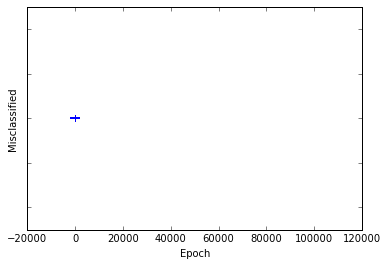

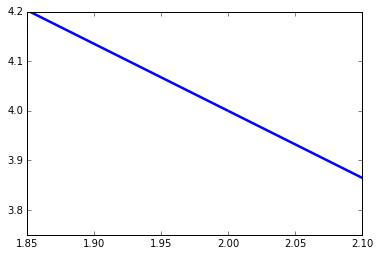

In [10]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Add our test samples
plt.scatter(2,2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4,3, s=120, marker='+', linewidths=2, color='blue')
w = svm_sgd_plot(X, y)

# Print the hyperplane calculated by svm_sgd()
x2=[w[0],w[1],-w[1],w[0]]
x3=[w[0],w[1],w[1],-w[0]]

x2x3 =np.array([x2,x3])
X,Y,U,V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X,Y,U,V,scale=1, color='blue')